In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scenarios
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set_context(context="notebook")
plt.rcParams["figure.dpi"] = 300

### Compute Pareto frontier for aggregated system

In [4]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedBaseline_MinCost = scenarios.build_complete_system("aggregated_baseline", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedBaseline_MinCost, "MinimizeCost")
baseline_cost = aggregatedBaseline_MinCost.totalCost.value
print(f"Baseline cost: {baseline_cost}")

Baseline cost: 11029176.038974134


In [5]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedBaseline_MinEmissions = scenarios.build_complete_system("aggregated_baseline", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedBaseline_MinEmissions, "MinimizeEmissions")
baseline_emissions = aggregatedBaseline_MinEmissions.totalEmissions.value
print(f"Baseline emissions: {baseline_emissions}")

Baseline emissions: 5.796440877596117e-09


In [6]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedGas_MinCost = scenarios.build_gas_only_system("aggregated_gas", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedGas_MinCost, "MinimizeCost")
gas_only_cost = aggregatedGas_MinCost.totalCost.value
print(f"Gas only scenario cost: {gas_only_cost}")

Gas only scenario cost: 17159305.072888896


In [7]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedGas_MinEmissions = scenarios.build_gas_only_system("aggregated_gas", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedGas_MinEmissions, "MinimizeEmissions")
gas_only_emissions = aggregatedGas_MinEmissions.totalEmissions.value
print(f"Gas only scenario emissions: {gas_only_emissions}")

Gas only scenario emissions: 53527567.643337056


In [70]:
site2 = "site2"
site2Baseline_MinCost = scenarios.build_complete_system("site2_baseline", directAccess=False, site=site2)
scenarios.run_scenario(site2Baseline_MinCost, "MinimizeCost")
baseline_cost = site2Baseline_MinCost.totalCost.value
print(f"Baseline cost: {baseline_cost}")

Baseline cost: 2155250.4941480323


In [71]:
site2 = "site2"
site2Baseline_MinEmissions = scenarios.build_complete_system("site2_baseline", directAccess=False, site=site2)
scenarios.run_scenario(site2Baseline_MinEmissions, "MinimizeEmissions")
baseline_emissions = site2Baseline_MinEmissions.totalEmissions.value
print(f"Baseline emissions: {baseline_emissions}")

Baseline emissions: 7.421122680121874e-10


In [72]:
site2 = "site2"
site2Gas_MinCost = scenarios.build_gas_only_system("site2_gas", directAccess=False, site=site2)
scenarios.run_scenario(site2Gas_MinCost, "MinimizeCost")
gas_only_cost = site2Gas_MinCost.totalCost.value
print(f"Gas only scenario cost: {gas_only_cost}")

Gas only scenario cost: 3444151.7717840318


In [73]:
site2 = "site2"
site2Gas_MinEmissions = scenarios.build_gas_only_system("site2_gas", directAccess=False, site=site2)
scenarios.run_scenario(site2Gas_MinEmissions, "MinimizeEmissions")
gas_only_emissions = site2Gas_MinEmissions.totalEmissions.value
print(f"Gas only scenario emissions: {gas_only_emissions}")

Gas only scenario emissions: 10574364.036246162


## Maia

In [ ]:
n_per_axis = 2
# Create values between baseline_cost and gas_only_cost
costCaps_to_try = np.linspace(baseline_cost, gas_only_cost, n_per_axis)
# Create values between baseline_emissions and gas_only_emissions
emissionsCaps_to_try = np.linspace(baseline_emissions, gas_only_emissions, n_per_axis)

print(costCaps_to_try)
print(emissionsCaps_to_try)

In [ ]:
# Try all scenarios of single obective optimization
allCosts = []
allEmissions = []
# Minimize cost subject to emissions cap
for emissionsCap in emissionsCaps_to_try:
    scenario = scenarios.build_complete_system("aggregated_MinCost_EmissionCap{}".format(emissionsCap), directAccess=False, site=aggregated)
    scenarios.run_scenario(scenario, "MinimizeCostWithEmissionsCap", emissionsCap=emissionsCap, save=False)
    allCosts.append(scenario.totalCost.value)
    allEmissions.append(scenario.totalEmissions.value)
# Minimize emissions subject to cost cap
for costCap in costCaps_to_try:
    scenario = scenarios.build_complete_system("aggregated_MinEmissions_CostCap{}".format(costCap), directAccess=False, site=aggregated)
    scenarios.run_scenario(scenario, "MinimizeEmissionsWithCostCap", costCap=costCap, save=False)
    allCosts.append(scenario.totalCost.value)
    allEmissions.append(scenario.totalEmissions.value)

In [ ]:
# Generate Pareto frontier by finding non-dominated points
pareto_frontier = []
for i in range(len(allCosts)):
    dominated = False
    for j in range(len(allCosts)):
        if allCosts[j] <= allCosts[i] and allEmissions[j] <= allEmissions[i] and i != j:
            dominated = True
            break
    if not dominated:
        pareto_frontier.append((allCosts[i], allEmissions[i]))
pareto_frontier = np.array(pareto_frontier)

# Sort by cost
pareto_frontier = pareto_frontier[np.argsort(pareto_frontier[:,0])]


## Aramis

In [182]:
costs1 = np.linspace(baseline_cost+10, 0.7*gas_only_cost, 5)
costs2 = np.linspace(0.7*gas_only_cost, 1.1*gas_only_cost, 6)[1:]
costs = np.concatenate((costs1, costs2))

In [213]:
cost3 = (costs1[0] + costs1[1])/2
scenarios.run_scenario(model, "MinimizeEmissionsWithCostCap", costCap=cost3, save=False, verbose=True)
emissions3 = model.totalEmissions.value

                                     CVXPY                                     
                                     v1.5.1                                    
(CVXPY) May 30 11:42:17 PM: Your problem has 315370 variables, 595688 constraints, and 26 parameters.
(CVXPY) May 30 11:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 30 11:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 30 11:42:17 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 30 11:42:17 PM: Compiling problem (target solver=MOSEK).
(CVXPY) May 30 11:42:17 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) May 30 11:42:1

In [230]:
costs = np.concatenate(([costs[0], cost3], costs[1:]))
emissions = np.concatenate(([emissions[0], emissions3], emissions[1:]))

In [184]:
emissions = []
model = scenarios.build_complete_system("site2", directAccess=False, site="site2")
for cost in costs:
    print(f"Cost cap: {np.round(cost/1e6, 3)} M$")
    scenarios.run_scenario(model, "MinimizeEmissionsWithCostCap", costCap=cost, save=False, verbose=True)
    emissions.append(model.totalEmissions.value)

Cost cap: 2.155 M$
                                     CVXPY                                     
                                     v1.5.1                                    
(CVXPY) May 30 11:28:41 PM: Your problem has 315370 variables, 595688 constraints, and 26 parameters.
(CVXPY) May 30 11:28:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 30 11:28:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 30 11:28:41 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 30 11:28:41 PM: Compiling problem (target solver=MOSEK).
(CVXPY) May 30 11:28:41 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CV

In [231]:
emissions = np.array(emissions)

In [232]:
pareto_frontier = np.vstack((costs, emissions)).T
pareto_frontier

array([[2155260.49414803, 1795871.46442853],
       [2187216.21241063, 1077954.38091471],
       [2219171.93067323,  911714.09066426],
       [2283083.36719843,  705464.2224121 ],
       [2346994.80372362,  580568.1827422 ],
       [2410906.24024882,  480836.14583165],
       [2686438.38199154,  228348.79129042],
       [2961970.52373427,   97769.76926304],
       [3237502.66547699,   31871.16988543],
       [3513034.80721971,   12026.09360975],
       [3788566.94896244,    6921.42197973]])

In [233]:
energyCons = (model.powerLoad.sum() + model.heatLoad.sum())/1000

In [234]:
pareto_frontier2 = np.copy(pareto_frontier)

In [235]:
pareto_frontier = pareto_frontier[:-1]
pareto_frontier

array([[2155260.49414803, 1795871.46442853],
       [2187216.21241063, 1077954.38091471],
       [2219171.93067323,  911714.09066426],
       [2283083.36719843,  705464.2224121 ],
       [2346994.80372362,  580568.1827422 ],
       [2410906.24024882,  480836.14583165],
       [2686438.38199154,  228348.79129042],
       [2961970.52373427,   97769.76926304],
       [3237502.66547699,   31871.16988543],
       [3513034.80721971,   12026.09360975]])

In [236]:
pareto_frontier = pareto_frontier / energyCons

In [237]:
pareto_frontier

array([[54.82958781, 45.68677078],
       [55.64253774, 27.42303984],
       [56.45548767, 23.1939053 ],
       [58.08138752, 17.94693154],
       [59.70728737, 14.76959015],
       [61.33318723, 12.23241819],
       [68.34269434,  5.80916791],
       [75.35220145,  2.48725208],
       [82.36170856,  0.81079903],
       [89.37121567,  0.30594249]])

In [238]:
import os 

In [239]:
folder_path = '/Users/aramisdufour/Documents/Stanford/Engineering Future Electricity Systems/decarbonindustry/layouts/results/paretto'
file_name = 'site2.npy'
full_path = os.path.join(folder_path, file_name)

In [240]:
np.save(full_path, pareto_frontier)

## Plots

In [241]:
sns.set_context(context="talk")
plt.rcParams["figure.dpi"] = 300

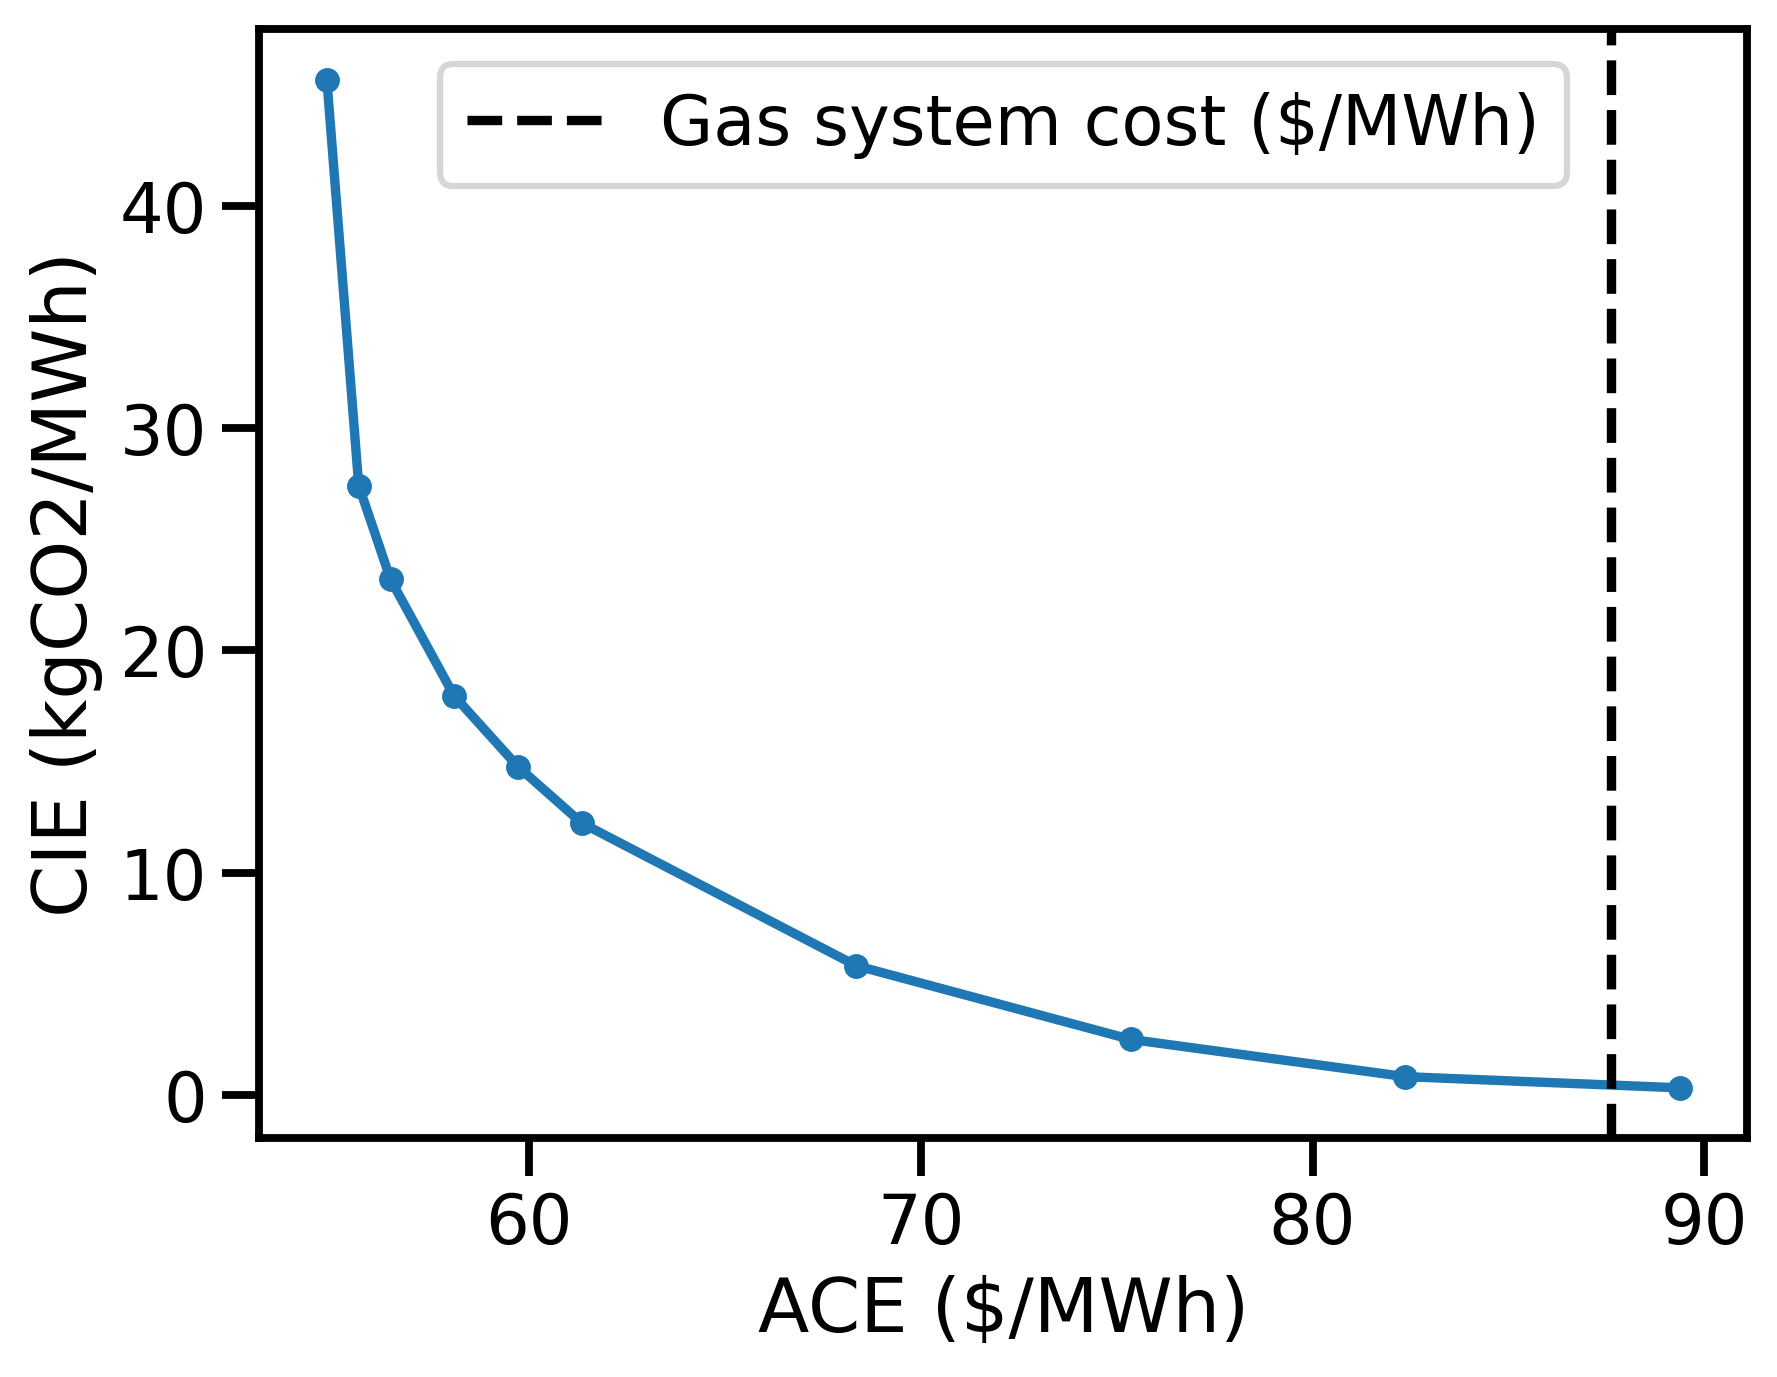

In [242]:
# Plot the results: cost vs emissions
plt.scatter(costs[:-1]/ energyCons, emissions[:-1]/ energyCons, s=20)
# Link the points of the Pareto frontier with a blue line
plt.plot(pareto_frontier[:,0], pareto_frontier[:,1])
plt.xlabel("ACE ($/MWh)")
plt.ylabel("CIE (kgCO2/MWh)")
plt.axvline(x=gas_only_cost/energyCons, color='black', linestyle='--', label='Gas system cost ($/MWh)')
plt.legend()

In [243]:
gas_only_emissions/energyCons

269.01064770474704

In [244]:
reductionToBaseline = - (emissions[1:-1] - emissions[0])
reductionToBaselinePercent = reductionToBaseline / emissions[0] * 100
incrementalReduction = - (emissions[1:-1] - emissions[:-2])
incrementalCost = costs[1:-1] - costs[:-2]
marginalCost = incrementalCost / incrementalReduction

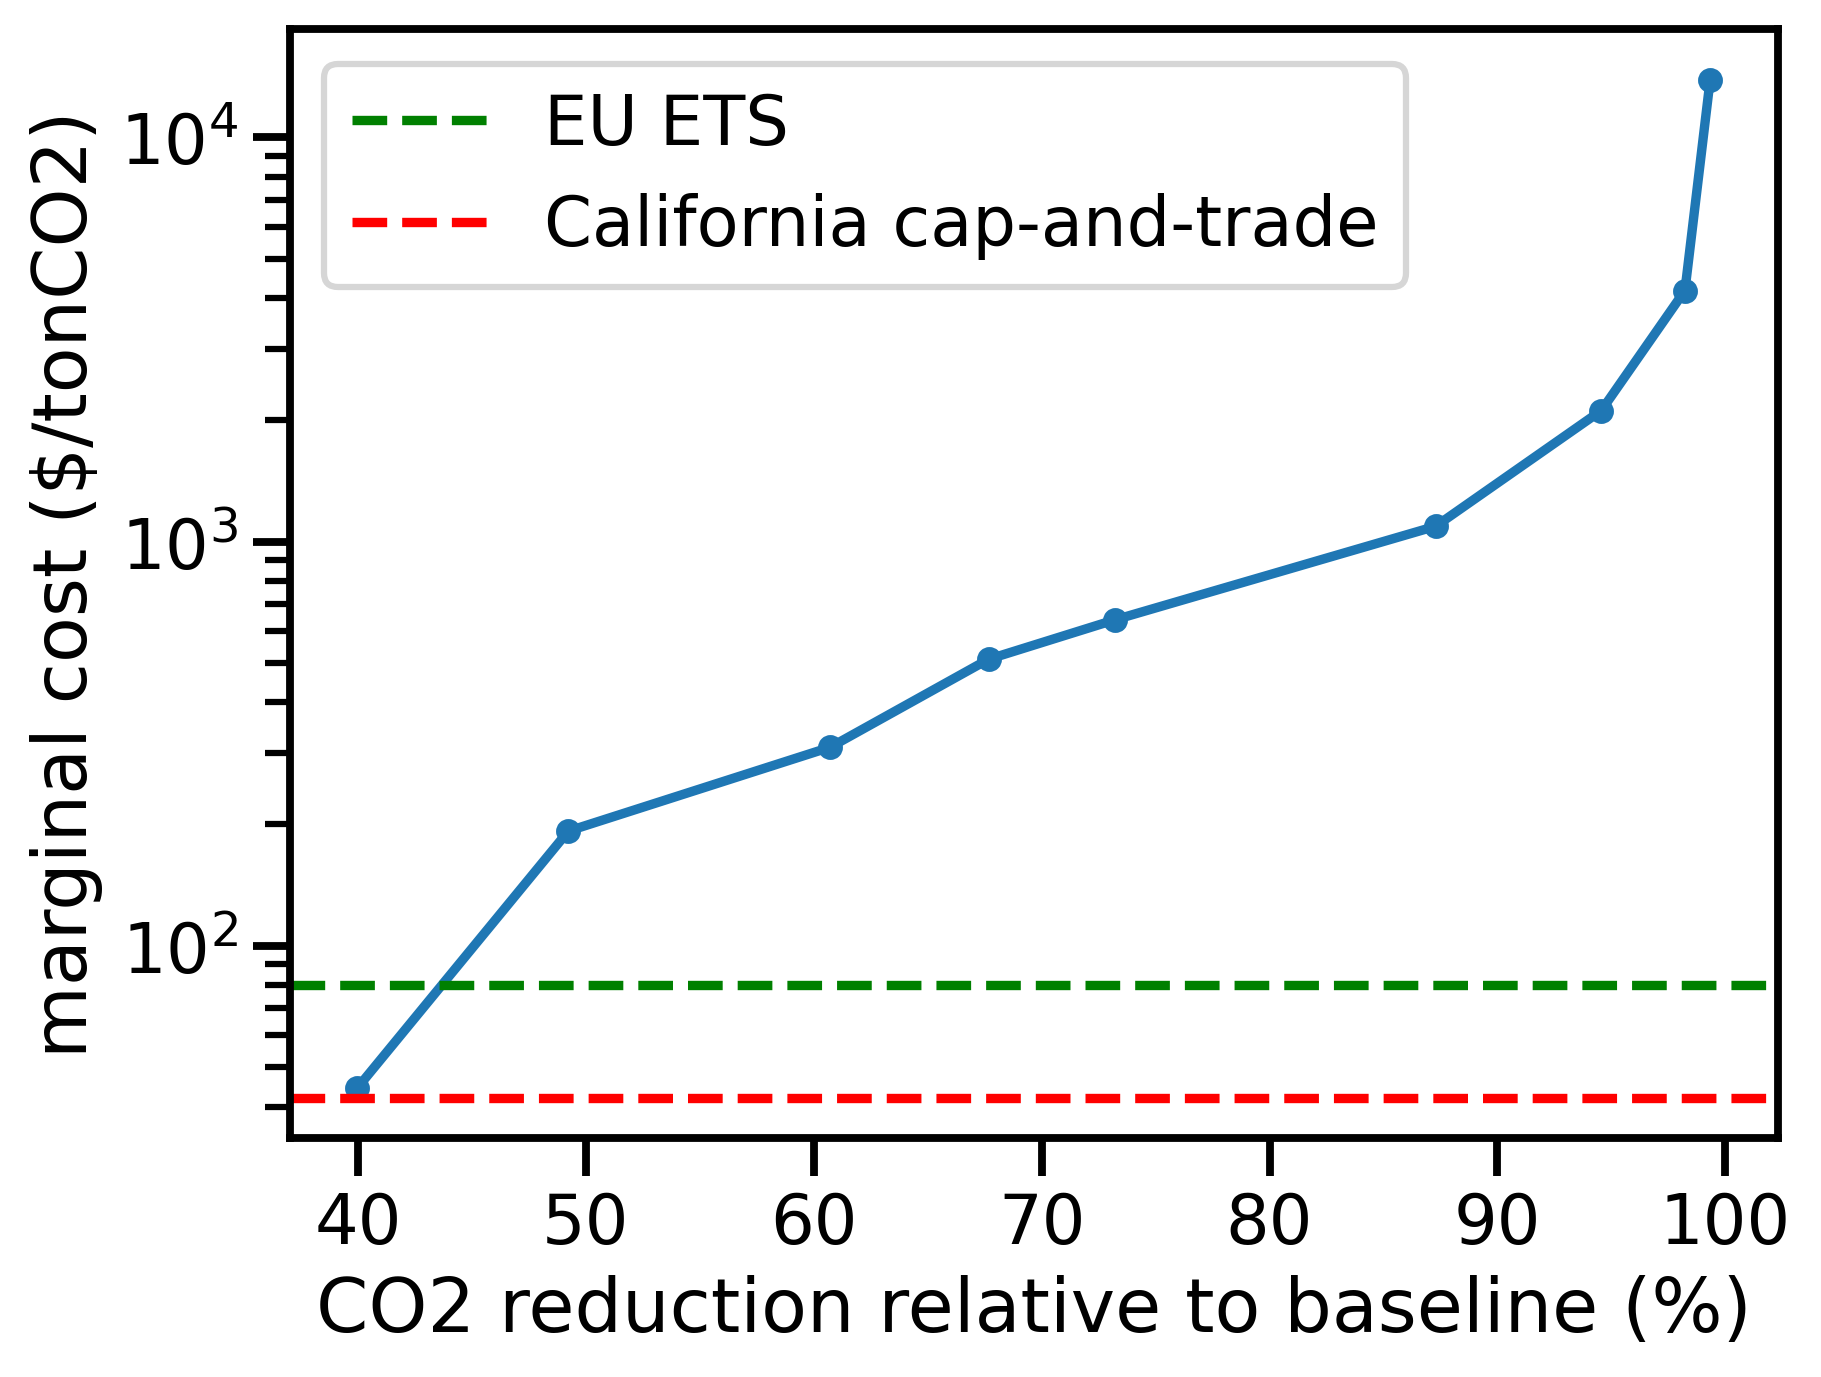

In [249]:
plt.scatter(reductionToBaselinePercent, marginalCost*1000, s=20)
# Link the points of the Pareto frontier with a blue line
plt.plot(reductionToBaselinePercent, marginalCost*1000)
plt.xlabel("CO2 reduction relative to baseline (%)")
plt.ylabel("marginal cost ($/tonCO2)")
plt.yscale("log")
plt.axhline(y=80, color='g', linestyle='--', label='EU ETS')
plt.axhline(y=42, color='r', linestyle='--', label='California cap-and-trade')
plt.legend()
plt.show()